# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline
load_dotenv()


True

In [2]:
# Read your api key environment variable
api_key = os.getenv('news_api')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_art = newsapi.get_everything(q='bitcoin', language='en')
print(f"Total articles about Bitcoin: {bitcoin_art['totalResults']}")
bitcoin_art['articles'][0]

Total articles about Bitcoin: 3768


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Crypto Traders Cut Out the Middleman, Simply Rob Victim',
 'description': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customer’s 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came in to do the trade.Read more...',
 'url': 'https://gizmodo.com/crypto-traders-cut-out-the-middleman-simply-rob-victim-1845011301',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/li0fkkejdmaugm8v1fkw.jpg',
 'publishedAt': '2020-09-10T14:28:00Z',
 'content': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]'}

In [5]:
# Fetch the Ethereum news articles
eth_art = newsapi.get_everything(q='ethereum', language='en')
print(f"Total articles about Ethereum {eth_art['totalResults']}")
eth_art['articles'][0]

Total articles about Ethereum 1415


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
 'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
 'url': 'https://mashable.com/article/metamask-ios-android/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
 'publishedAt': '2020-09-02T16:00:00Z',
 'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"}

In [6]:
# Create the Bitcoin sentiment scores &  DataFrame
#Create Sentiment Scores
bit_sentiments = []

for article in bitcoin_art['articles']:
    try:
        text = article['content']
        date = article['publishedAt']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bit_sentiments.append({
            'Text': text,
            'Date': date,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bit_df = pd.DataFrame(bit_sentiments)

# Reorder DataFrame columns
cols = ['Compound', 'Negative', 'Neutral', 'Positive', 'Text']
bit_df = bit_df[cols]

bit_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.6908,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...
1,0.0000,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
2,0.2732,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...
3,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."
4,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."


In [7]:
# Create the Ethereum sentiment scores & DataFrame
#Create Sentiment Scores
eth_sentiments = []

for article in eth_art['articles']:
    try:
        text = article['content']
        date = article['publishedAt']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        eth_sentiments.append({
            'Text': text,
            'Date': date,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ['Compound', 'Negative', 'Neutral', 'Positive', 'Text']
eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
4,0.0000,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...


In [8]:
# Describe the Bitcoin Sentiment
bit_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.371550,0.008000,0.915950,0.076050
std,0.320603,0.035777,0.046388,0.046397
min,-0.690800,0.000000,0.802000,0.000000
25%,0.448550,0.000000,0.910000,0.083250
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.910000,0.090000
max,0.750600,0.160000,1.000000,0.198000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.173619,0.015688,0.925187,0.059187
std,0.300942,0.034763,0.088060,0.071875
min,-0.267700,0.000000,0.747000,0.000000
25%,0.000000,0.000000,0.871000,0.000000
50%,0.000000,0.000000,0.962000,0.022500
75%,0.401900,0.000000,1.000000,0.097250
max,0.757900,0.110000,1.000000,0.209000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin 

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list (Included this in next step)
sw_addon = {'fucking', 'whats', 'writes', 'char', 'via'}

In [12]:
#lemmatizer
lemmatizer = WordNetLemmatizer()

In [13]:
# Complete the tokenizer functionn (added additional SW)
def tokenizer (text):
    """Tokenizes text."""
    # Create a list of the words
    sw = set(stopwords.words('english')) 
   
    regex = re.compile('[^a-zA-Z ]')
    sw_addon = {'fucking', 'whats', 'writes', 'char', 'via'}
    re_clean = regex.sub(' ', text) 
    
  
    words = word_tokenize(re_clean)
    
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    tokens = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
    
    
    
     
    return tokens



In [14]:
# Create a new tokens column for Bitcoin
bit_df['Token'] = bit_df['Text'].apply(tokenizer)
bit_df.head()

,Compound,Negative,Neutral,Positive,Text,Token
0,-0.6908,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, traders, singapore, app..."
1,0.0000,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry..."
2,0.2732,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...,"[covid, pandemic, resulted, mass, shift, worki..."
3,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagos, london, reuters, four, months, ago, ab..."
4,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagos, london, reuters, four, months, ago, ab..."


In [15]:
# Create a new tokens column for Ethereum
eth_df['Token'] = eth_df['Text'].apply(tokenizer)
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,Token
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...,"[interacted, cryptocurrencies, past, couple, y..."
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...,"[tl, dr, complete, stock, cryptocurrency, inve..."
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, read, opinions, expressed, en..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sounds, like, surefire, bet,..."
4,0.0000,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklyn, based, technolo..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams
from pprint import pprint

In [18]:
# Generate the Bitcoin N-grams where N=2
bit_text = bit_df['Text'].str.cat()
bit_text_proc = tokenizer(bit_text)
bigrams_counts = Counter(ngrams(bit_text_proc, n=2))
pprint(dict(bigrams_counts.most_common(10)))

{('another', 'edition'): 14,
 ('chars', 'robot'): 14,
 ('colleague', 'satoshi'): 14,
 ('day', 'welcome'): 14,
 ('edition', 'bitcoin'): 14,
 ('every', 'day'): 14,
 ('nakaboto', 'bitcoin'): 14,
 ('robot', 'colleague'): 14,
 ('satoshi', 'nakaboto'): 28,
 ('welcome', 'another'): 14}


In [19]:
# Generate the Ethereum N-grams where N=2
eth_text = eth_df['Text'].str.cat()
eth_text_proc = tokenizer(eth_text)
bigrams_counts = Counter(ngrams(eth_text_proc, n=2))
pprint(dict(bigrams_counts.most_common(10)))

{('chars', 'ethereum'): 2,
 ('decentralized', 'exchange'): 2,
 ('getty', 'images'): 3,
 ('images', 'lightrocket'): 2,
 ('interacted', 'cryptocurrencies'): 1,
 ('lightrocket', 'getty'): 2,
 ('photo', 'illustration'): 2,
 ('price', 'bitcoin'): 2,
 ('satoshi', 'nakaboto'): 2,
 ('sopa', 'images'): 2}


In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
token_count(bit_text_proc, N=10)

[('bitcoin', 43),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('chars', 20),
 ('robot', 14),
 ('colleague', 14),
 ('every', 14),
 ('day', 14),
 ('welcome', 14),
 ('another', 14)]

In [22]:
# Get the top 10 words for Ethereum
token_count(eth_text_proc, N=10)

[('chars', 16),
 ('bitcoin', 8),
 ('ethereum', 7),
 ('cryptocurrency', 6),
 ('images', 5),
 ('price', 4),
 ('getty', 4),
 ('used', 3),
 ('decentralized', 3),
 ('exchange', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

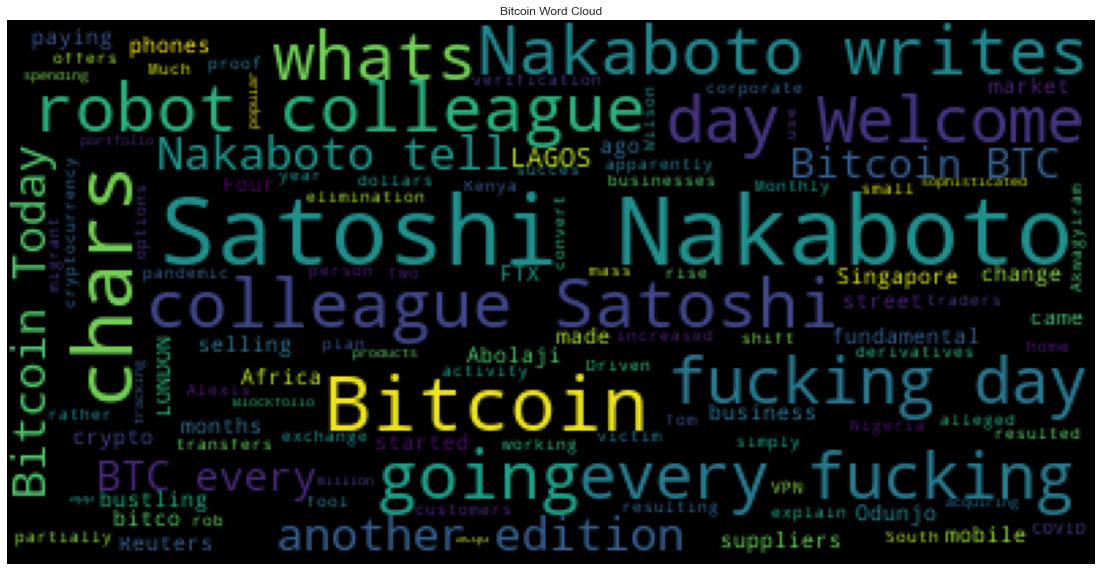

In [24]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bit_text)
plt.title('Bitcoin Word Cloud')
plt.axis(False)
plt.imshow(wc)

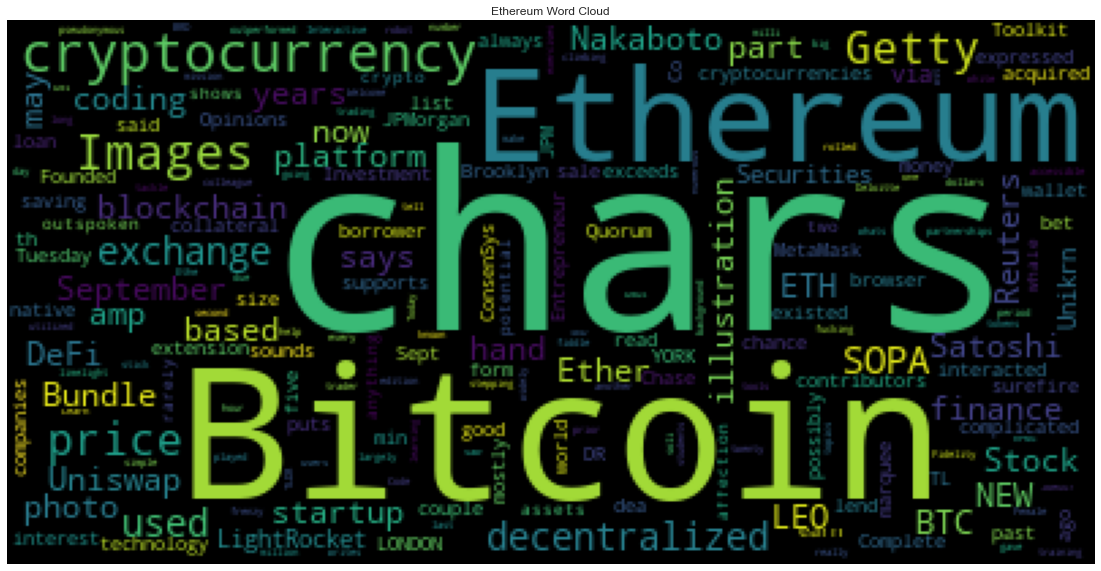

In [25]:
wc = WordCloud().generate(eth_text)
plt.title('Ethereum Word Cloud')
plt.axis(False)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [28]:
# Concatenate all of the bitcoin text together
bit_text = bit_df['Text'].str.cat()
bit_text

'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]By Alexis Akwagyiram, Tom Wilson\r\n* Monthly crypto transfers to and from Africa rise 55% in a year\r\n* Much of the activity in Nigeria, South Africa and Kenya\r\n* Driven by small businesses and migrant… [+7730 chars]“The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-person verification, which can partially explain the succes… [+3548 chars]LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos: He started paying his suppliers in bitco… [+7646 chars]LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling st

In [29]:
# Run the NER processor on all of the text
# Add a title to the document
doc_b = nlp(bit_text)

# Add Ttile
doc_b.user_data["title"] = "Bitcoin NER"

# Render the visualization
displacy.render(doc_b, style='ent')

In [30]:
# List all Entities
bit_entities = [(ent.text, ent.label_ )for ent in doc_b.ents]
bit_entities

[('Two', 'CARDINAL'),
 ('Singapore', 'GPE'),
 ('365,000 Singapore dollars', 'MONEY'),
 ('bitcoin', 'GPE'),
 ('Alexis Akwagyiram', 'PERSON'),
 ('Tom Wilson', 'PERSON'),
 ('Monthly', 'DATE'),
 ('Africa', 'LOC'),
 ('55%', 'PERCENT'),
 ('a year', 'DATE'),
 ('Nigeria', 'GPE'),
 ('South Africa', 'GPE'),
 ('Kenya', 'GPE'),
 ('VPN', 'PRODUCT'),
 ('LONDON', 'GPE'),
 ('Reuters', 'ORG'),
 ('Four months ago', 'DATE'),
 ('Abolaji Odunjo', 'ORG'),
 ('Lagos', 'GPE'),
 ('LONDON', 'GPE'),
 ('Reuters', 'ORG'),
 ('Four months ago', 'DATE'),
 ('Abolaji Odunjo', 'ORG'),
 ('Lagos', 'GPE'),
 ('Satoshi Nakaboto', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('Bitcoin', 'GPE'),
 ('Today', 'DATE'),
 ('Satoshi Nakaboto', 'PERSON'),
 ('Bitcoin', 'GPE'),
 ('Satoshi Nakaboto', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('Bitcoin', 'GPE'),
 ('Today', 'DATE'),
 ('Satoshi Nakaboto', 'PERSON'),
 ('Bitcoin', 'GPE'),
 ('Satoshi Nakaboto', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('Bitcoin', 'GPE'),
 ('Today', 'DATE'),
 ('Satoshi Nakaboto', 'PERSON'),
 ('Bitco

---

## Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_text = eth_df['Text'].str.cat()
eth_text

"If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars]September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars]LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars]NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain

In [32]:
# Render the visualization
doc_e = nlp(eth_text)

# Add Title
doc_e.user_data["title"] = "Ethereum NER"

# Render the visualization
displacy.render(doc_e, style='ent')

In [33]:
# List all Entities
eth_entities = [(ent.text, ent.label_ )for ent in doc_e.ents]
eth_entities

[('the past couple of years', 'DATE'),
 ('The Complete Stock and Cryptocurrency Investment Toolkit Bundle', 'ORG'),
 ('29.46', 'MONEY'),
 ('Sept. 7', 'DATE'),
 ('97%', 'PERCENT'),
 ('18, 2020', 'DATE'),
 ('6 min', 'QUANTITY'),
 ('five years ago', 'DATE'),
 ('Ethereum', 'ORG'),
 ('ETH', 'ORG'),
 ('Reuters', 'ORG'),
 ('about 20%', 'PERCENT'),
 ('YORK', 'PERSON'),
 ('Reuters', 'ORG'),
 ('Brooklyn', 'GPE'),
 ('ConsenSys', 'ORG'),
 ('JPMorgan Chase &amp', 'ORG'),
 ('Quorum', 'PRODUCT'),
 ('Tuesday', 'DATE'),
 ('Bitcoin', 'GPE'),
 ('BTC', 'ORG'),
 ('two', 'CARDINAL'),
 ('UNUS SED LEO', 'ORG'),
 ('LEO', 'ORG'),
 ('Satoshi Nakaboto', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('Bitcoin', 'GPE'),
 ('Today', 'DATE'),
 ('Satoshi Nakaboto', 'PERSON'),
 ('Bitcoin', 'GPE'),
 ('second', 'ORDINAL'),
 ('one', 'CARDINAL'),
 ('bitcoin', 'GPE'),
 ('more than 10%', 'PERCENT'),
 ('24-hour', 'TIME'),
 ('chars]$100 million', 'MONEY'),
 ('Deloitte', 'ORG'),
 ('KPMG', 'ORG'),
 ('Fidelity', 'ORG'),
 ('$100 milli', 'MONEY'),


### Extra Work Dependency Trees

In [41]:
# Show the Bitcoin dependency tree
displacy.render(doc_b, style="dep")

In [35]:
# Show the Ethereum dependency tree
displacy.render(doc_e, style="dep")